# E164: Introduction to Biological System Design
## Introduction to Biological Data Analysis
### Ayush Pandey

If you have not setup your computer to run this notebook, make sure to follow steps here: https://docs.google.com/document/d/1js7XQbjorU5LCIoWfrzkUCXjjQkVcITkT0N8osiy4Go/edit?usp=sharing

The purpose of this interactive Python notebook is to introduce basic data analysis tools available in Python with the help of biological data examples.

If you have installed numpy, scipy, matplotlib, and pandas already, then you are all set to run this notebook.

# Data Analysis with Python
## Introduction to Pandas

You can think of Pandas as the Python data-management library. It can be used to manage large quantities of data in a structured way so you don't get lost and provides functions to retreive/store/edit your data so that it is easily interfaced with numerical, scientific, and plotting libraries.

More information on Pandas here: https://pandas.pydata.org/pandas-docs/stable/

Data is often stored as .csv files. Here's how to import a CSV file with Pandas and structure the data as desired.

In [54]:
import pandas as pd

url = 'https://raw.githubusercontent.com/biocircuits/bioscrape/master/inference%20examples/data/od_data.csv'
# To import a CSV file, you can use the `read_csv` function. 
# Either provide a URL as its input or a string of address to the CSV file on your local machine.
df = pd.read_csv(url)
# You get a "dataframe" object out that contains all of the data in the CSV file

### In an IPYNB (like this one), the Pandas dataframes are nicely formatted:

In [55]:
df

,Time,t,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12
0,0:09:19,9.32,0.086,0.087,0.088,0.095,0.091,0.089,0.090,0.085,0.090,0.090,0.088,0.091
1,0:19:19,19.32,0.086,0.090,0.089,0.090,0.091,0.092,0.091,0.086,0.092,0.092,0.088,0.090
2,0:29:19,29.32,0.086,0.088,0.090,0.089,0.089,0.092,0.093,0.087,0.089,0.093,0.089,0.092
3,0:39:19,39.32,0.088,0.090,0.091,0.090,0.092,0.093,0.096,0.088,0.091,0.093,0.090,0.094
4,0:49:19,49.32,0.089,0.092,0.093,0.092,0.094,0.096,0.099,0.091,0.093,0.094,0.094,0.096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,11:29:19,689.32,0.543,0.562,0.614,0.604,0.573,0.566,0.615,0.572,0.570,0.566,0.568,0.606
69,11:39:19,699.32,0.543,0.563,0.615,0.605,0.574,0.568,0.616,0.572,0.570,0.568,0.569,0.607
70,11:49:19,709.32,0.545,0.564,0.616,0.606,0.574,0.569,0.617,0.575,0.572,0.568,0.570,0.608
71,11:59:19,719.32,0.544,0.565,0.617,0.607,0.575,0.570,0.618,0.576,0.573,0.570,0.570,0.609


### Accessing the dataframe in arrays:

In [57]:
import numpy as np
time_array = np.array(df['t'])

In [59]:
# Here's the time in minutes from the dataset:
time_array

array([  9.32,  19.32,  29.32,  39.32,  49.32,  59.32,  69.32,  79.32,
        89.32,  99.32, 109.32, 119.32, 129.32, 139.32, 149.32, 159.32,
       169.32, 179.32, 189.32, 199.32, 209.32, 219.32, 229.32, 239.32,
       249.32, 259.32, 269.32, 279.32, 289.32, 299.32, 309.32, 319.32,
       329.32, 339.32, 349.32, 359.32, 369.32, 379.32, 389.32, 399.32,
       409.32, 419.32, 429.32, 439.32, 449.32, 459.32, 469.32, 479.32,
       489.32, 499.32, 509.32, 519.32, 529.32, 539.32, 549.32, 559.32,
       569.32, 579.32, 589.32, 599.32, 609.32, 619.32, 629.32, 639.32,
       649.32, 659.32, 669.32, 679.32, 689.32, 699.32, 709.32, 719.32,
       729.32])

### Plotting dataframe using matplotlib:

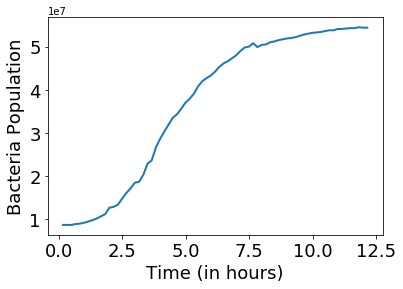

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# Plot the data for the container A1 against time:
# Convert time to hours and "A1" density data to cell counts.
ax.plot(df['t']/60, df['A1']*1e8, lw = 2)
ax.set_xlabel('Time (in hours)', fontsize = 18)
ax.set_ylabel('Bacteria Population', fontsize = 18)
ax.tick_params(labelsize = 18)

### Now plot all data together:

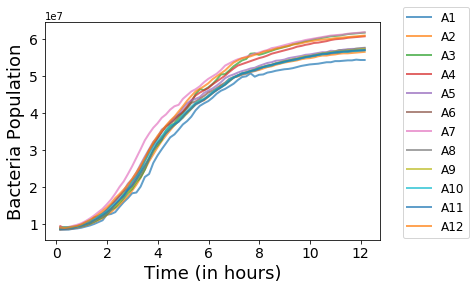

In [60]:
fig, ax = plt.subplots()
for column_title in df:
    # the first two columns are not data, they are time columns, so we ignore those:
    if column_title == 't' or column_title == "Time":
        # Skip this and continue to iterate
        continue
    ax.plot(df['t']/60, df[column_title]*1e8, alpha = 0.7, lw = 2, label = column_title)
ax.set_xlabel('Time (in hours)', fontsize = 18)
ax.set_ylabel('Bacteria Population', fontsize = 18)
ax.tick_params(labelsize = 14)
# bbox_to_anchor command  is used to set the position of the legend box
ax.legend(fontsize = 12, bbox_to_anchor = (1.05,1.1), loc = "best");

## Manually fit logistic growth to the OD data

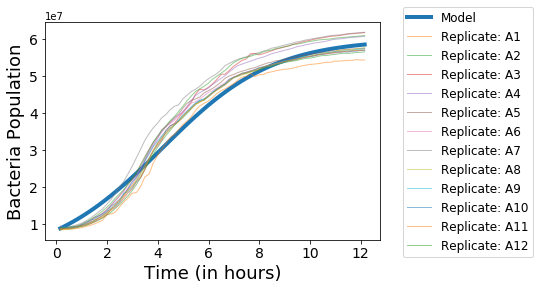

In [61]:
import numpy as np
def logistic_growth(t, x, k, C):
    return k*x*(1 - x/C)

timepoints = np.array(df['t']/60) # time array in hours
from my_numerical_integrators import integrate

# x(t+ dt) = x(t) + f(x,t)*dt

x0 = np.mean(df.iloc[0][2:])*1e8 # Initial condition = Get from data
k = 0.45 # growth rate in 1/hour unit
C = 6e7 # maximum capacity
x = integrate(logistic_growth, timepoints, x0, k, C)
fig, ax = plt.subplots()
# Plot model simulation
ax.plot(timepoints, x, linewidth = 4, label = 'Model')

# Plot experimental data
for column_title in df:
    # the first two columns are not data, they are time columns, so we ignore those:
    if column_title == 't' or column_title == "Time":
        # Skip this and continue to iterate
        continue
    ax.plot(timepoints, df[column_title]*1e8, alpha = 0.5, lw = 1, label = 'Replicate: '+column_title)
ax.set_xlabel('Time (in hours)', fontsize = 18)
ax.set_ylabel('Bacteria Population', fontsize = 18)
ax.tick_params(labelsize = 14)
# bbox_to_anchor command  is used to set the position of the legend box
ax.legend(fontsize = 12, bbox_to_anchor = (1.05,1.1), loc = "best");



## Data Analysis:

1. Steady state analysis (Week 7)
2. Growth rate computation (Week 2)
3. State-space exploration (Week 9)
4. Asymptotic analysis